In [7]:

%matplotlib inline
from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

from IPython.html import widgets

from IPython.html.widgets import interact, fixed
# seed the random number generator so we all get the same results
numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'
    

In [9]:


mu1, sig1 = 178, 7.7
male_height = scipy.stats.norm(mu1, sig1)

In [10]:
mu2, sig2 = 163, 7.3
female_height = scipy.stats.norm(mu2, sig2)

In [11]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = numpy.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

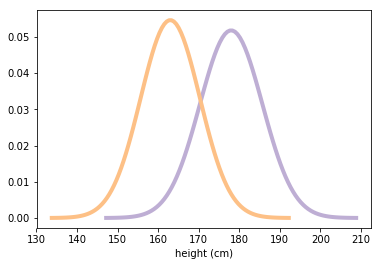

In [12]:
xs, ys = eval_pdf(male_height)
pyplot.plot(xs, ys, label='male', linewidth=4, color=COLOR2)

xs, ys = eval_pdf(female_height)
pyplot.plot(xs, ys, label='female', linewidth=4, color=COLOR3)
pyplot.xlabel('height (cm)')

In [13]:
male_sample = male_height.rvs(1000)

In [14]:
female_sample = female_height.rvs(1000)

In [15]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(178.16511665818112, 7.8419961712899502)

In [16]:
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.48610226651135, 7.382384919896662)

In [17]:
difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means # in cm

14.679014391669767

In [19]:
relative_difference = difference_in_means / male_sample.mean()
relative_difference * 100   # percent

8.2389946286916569

In [20]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.82560946234622

In [21]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.6040359174722

In [22]:
male_below_thresh = sum(male_sample < thresh)
male_below_thresh

164

In [23]:
sum(x > y for x, y in zip(male_sample, female_sample)) / len(male_sample)

0.91100000000000003

In [25]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

In [26]:
CohenEffectSize(male_sample, female_sample)

1.9274780043619493